<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/TensorFlowCNNFashionNMIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
2.18.0


In [2]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# the data is only 2D
# convolution expects height x wifth x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# number of classes
K = len(set(y_train)) # get the unique elements
print("Number of classes:", K)

Number of classes: 10


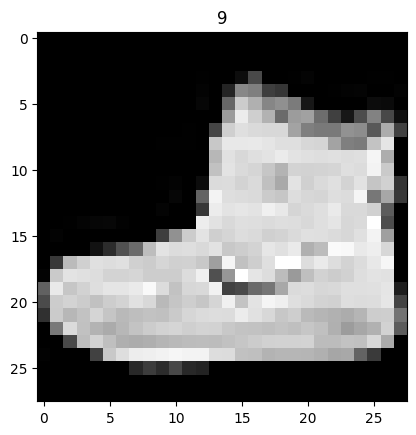

In [6]:
# Showing an image
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [7]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu')(i) # Convolution Layer
x = Conv2D(64, (3,3), strides = 2, activation='relu')(x) # Convolution Layer
x = Conv2D(128, (3,3), strides = 2, activation='relu')(x) # Convolution Layer
x = Flatten()(x) # convert the image into a feature vecto r
x = Dropout(0.2)(x) # regularization

x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [8]:
# Compile and fit
# Note: make sure you are using the GPU for this
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7460 - loss: 0.6861 - val_accuracy: 0.8531 - val_loss: 0.4008
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8607 - loss: 0.3716 - val_accuracy: 0.8714 - val_loss: 0.3478
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8830 - loss: 0.3110 - val_accuracy: 0.8857 - val_loss: 0.3112
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8976 - loss: 0.2729 - val_accuracy: 0.8880 - val_loss: 0.3089
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9059 - loss: 0.2495 - val_accuracy: 0.8919 - val_loss: 0.3015
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9125 - loss: 0.2287 - val_accuracy: 0.8954 - val_loss: 0.2970
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9187 - loss: 0.2091 - val_accuracy: 0.8908 - val_loss: 0.3096
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9269 - loss: 0.1914

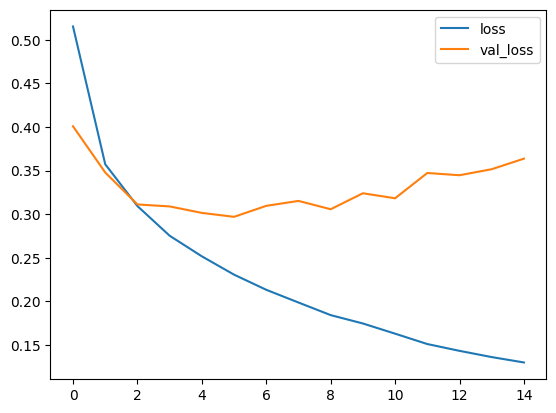

In [10]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
# overfitting a little bit

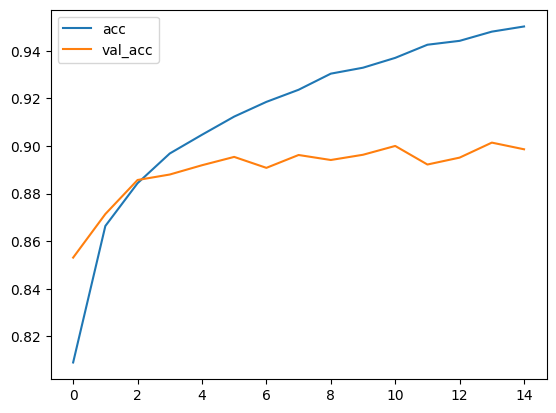

In [11]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
This function prints and plots the confusion matrix.
Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest')
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color= 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted label')
  plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion matrix, without normalization
[[848   2  19  11   1   1 115   0   3   0]
 [  4 977   1  12   2   0   3   0   1   0]
 [ 20   1 830   6  65   0  77   0   1   0]
 [ 20   9  15 874  34   0  47   0   1   0]
 [  2   1  37  22 844   0  93   0   1   0]
 [  1   0   0   0   0 968   0  23   0   8]
 [ 97   0  55  15  73   0 750   0  10   0]
 [  0   0   0   0   0  12   0 967   0  21]
 [  3   1   3   2   3   2  10   1 975   0]
 [  0   0   0   0   0   9   1  36   1 953]]


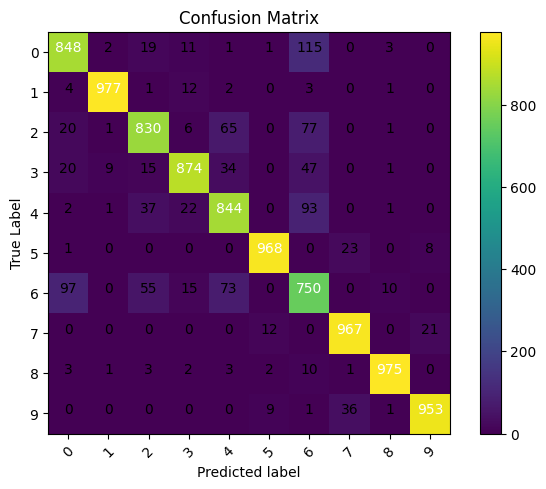

In [13]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
# Label mapping
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

In [15]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'boot']

Text(0.5, 1.0, 'True label: Shirt Predicted: Dress')

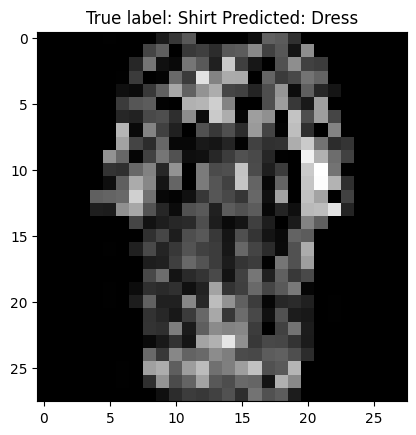

In [31]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))

|